### About the dataset

This dataset contains ratings for ten thousand popular books.
Ratings go from one to five.
Both book IDs and user IDs are contiguous. For books, they are 1-10000, for users, 1-53424. All users have made at least two ratings.

There are also books marked to read by the users, book metadata (author, year, etc.) and tags.

- to_read.csv provides IDs of the books marked "to read" by each user, as userid, book_id pairs
- book_tags.csv contains tags(genres) assigned by users to books. Tags in this file are represented by their IDs
- tags.csv translates tag IDs to names
- ratings.csv contains ratings

This dataset contains six million ratings for ten thousand most popular (with most ratings) books. There are also:
- books marked to read by the users
- book metadata (author, year, etc.)
- tags (genres)

Book Metadata:
- Book IDs
- ISBN
- Authors
- Publication Year
- Title (with information on the book’s Saga)
- Original Title (book title only)
- Language
- Rating information
- Average Rating
- Number of Total Ratings
- Number of Ratings per Rating Value (1 - 5)
- Number of Text Reviews
- Image URL

Types of techniques
- Collabrative filtering
- Content based recommendation
- Sentiment analysis

 Objective - To build a Book Recommender System using this dataset which will recommend books to read

Libraries
- Pandas
- Numpy
- Seaborn
- Matplotlib


Visualisations 
- Barplot: performs a comparison of metric values
- Heatmap: helps visualise magnitude
- Histogram: organizes a group of data points into user-specified ranges

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')
booktags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')

In [3]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
tags.tag_name.value_counts()

-               1
oz              1
p-d-f           1
p-d-eastman     1
p-cornwell      1
               ..
farm-life       1
farm-animals    1
farm            1
farley-mowat    1
ｆａｖｏｕｒｉｔｅｓ      1
Name: tag_name, Length: 34252, dtype: int64

In [6]:
# Since tag IDs and tag names are in different files we will join the csv files of book_tags and tags
Alltags = pd.merge(booktags,tags)

In [7]:
books.shape 

(10000, 23)

23 columns

In [8]:
ratings.shape

(981756, 3)

3 columns

In [9]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [10]:
# Unique values in dataset
ratings.nunique()

book_id    10000
user_id    53424
rating         5
dtype: int64

### Exploratory Data Analysis

In [11]:
# Checking for missing values
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [12]:
ratings.rating.value_counts() # Ratings no.

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

In [13]:
ratings.book_id.value_counts() # Ratings per book

1       100
5198    100
5215    100
5214    100
9803    100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Name: book_id, Length: 10000, dtype: int64

In [14]:
# Checking for missing values
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

#### We observe that books have null values whereas ratings dont

In [15]:
# Removing unneccessary columns from books
books.drop("isbn", axis=1, inplace=True)
books.drop("isbn13",inplace=True, axis=1)
books.drop("image_url",inplace=True, axis=1)
books.drop("small_image_url",inplace=True, axis=1)
books.drop("books_count",inplace=True, axis=1)
books.drop("original_title",inplace=True, axis=1)
books.drop("original_publication_year",inplace=True, axis=1)
books.drop("best_book_id",inplace=True, axis=1)

In [16]:
books.isnull().sum()

id                            0
book_id                       0
work_id                       0
authors                       0
title                         0
language_code              1084
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
dtype: int64

In [17]:
books = books.fillna(books.mode().iloc[0]) # replaced missing values with most occuring values in the column

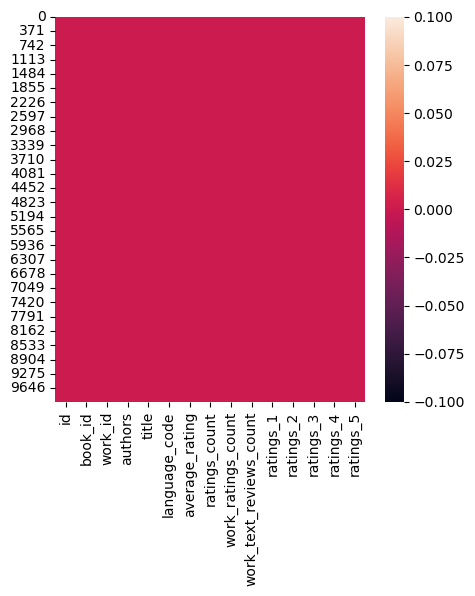

In [18]:
# We cross check after filling the missing values with the most occuring values in the column
plt.figure(figsize=(5,5))
sns.heatmap(books.isnull())
plt.show()

We would have observed white spaces in the heatmap if null values were present. 
Since there are none, that means there are no null values

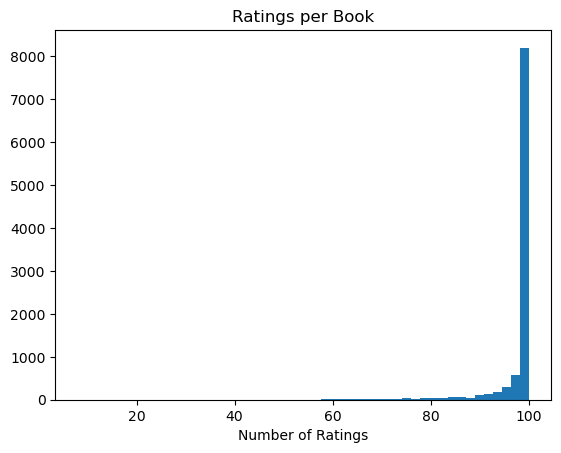

In [19]:
plt.hist(ratings.book_id.value_counts(), bins=50)
plt.title("Ratings per Book")
plt.xlabel("Number of Ratings")
plt.show()

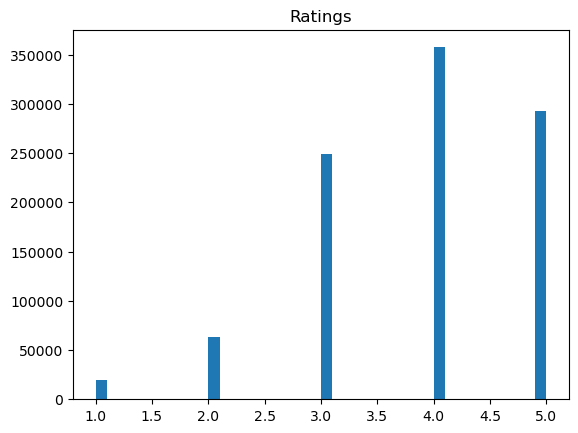

In [20]:
plt.hist(ratings['rating'], bins=40)
plt.title("Ratings")
plt.show()

<Axes: xlabel='book_id', ylabel='average_rating'>

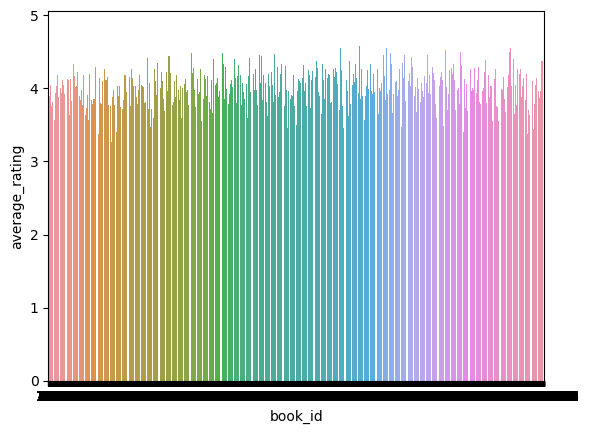

In [21]:
sns.barplot(y="average_rating", x="book_id" , data=books)

In [22]:
# Displaying list of books
i=0
for tn in books['title']:
    print(i,tn)
    i = i + 1    

0 The Hunger Games (The Hunger Games, #1)
1 Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
2 Twilight (Twilight, #1)
3 To Kill a Mockingbird
4 The Great Gatsby
5 The Fault in Our Stars
6 The Hobbit
7 The Catcher in the Rye
8 Angels & Demons  (Robert Langdon, #1)
9 Pride and Prejudice
10 The Kite Runner
11 Divergent (Divergent, #1)
12 1984
13 Animal Farm
14 The Diary of a Young Girl
15 The Girl with the Dragon Tattoo (Millennium, #1)
16 Catching Fire (The Hunger Games, #2)
17 Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
18 The Fellowship of the Ring (The Lord of the Rings, #1)
19 Mockingjay (The Hunger Games, #3)
20 Harry Potter and the Order of the Phoenix (Harry Potter, #5)
21 The Lovely Bones
22 Harry Potter and the Chamber of Secrets (Harry Potter, #2)
23 Harry Potter and the Goblet of Fire (Harry Potter, #4)
24 Harry Potter and the Deathly Hallows (Harry Potter, #7)
25 The Da Vinci Code (Robert Langdon, #2)
26 Harry Potter and the Half-Blood Prince (Harry P

#### Preparing the data

In [23]:
# Top 10 rated books
toprated = books.sort_values('average_rating', ascending=False)[0:10]

# Top 10 popular books
popular = books.sort_values('ratings_count', ascending=False)[0:10]

In [24]:
print("Top 10 rated books are -")
print("")
for i in toprated['title']:
    print(i)

print("")
print("------------------------------------")
print("")

print("Top 10 popular books are -")
print("")
for j in popular['title']:
    print(j)
    


Top 10 rated books are -

The Complete Calvin and Hobbes
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
Words of Radiance (The Stormlight Archive, #2)
Mark of the Lion Trilogy
ESV Study Bible
It's a Magical World: A Calvin and Hobbes Collection
There's Treasure Everywhere: A Calvin and Hobbes Collection
Harry Potter Boxset (Harry Potter, #1-7)
Harry Potter Collection (Harry Potter, #1-6)
The Indispensable Calvin and Hobbes

------------------------------------

Top 10 popular books are -

The Hunger Games (The Hunger Games, #1)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Twilight (Twilight, #1)
To Kill a Mockingbird
The Great Gatsby
The Fault in Our Stars
The Hobbit
The Catcher in the Rye
Pride and Prejudice
Angels & Demons  (Robert Langdon, #1)


In [25]:
# We use merge instead of concat because merge offers flexibility, concat stacks up multiple dataframes
maindf=pd.merge(books,ratings) 
maindf.tail()

,id,book_id,work_id,authors,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
79696,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,46715,4
79697,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,47073,4
79698,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,49663,3
79699,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,50305,3
79700,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,52244,4


Since both our dataframes books and ratings have no null values therefore maindf wont have null values as well

In [26]:
maindf.shape

(79701, 17)

In [27]:
maindf.info() # getting info on the merged dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79701 entries, 0 to 79700
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       79701 non-null  int64  
 1   book_id                  79701 non-null  int64  
 2   work_id                  79701 non-null  int64  
 3   authors                  79701 non-null  object 
 4   title                    79701 non-null  object 
 5   language_code            79701 non-null  object 
 6   average_rating           79701 non-null  float64
 7   ratings_count            79701 non-null  int64  
 8   work_ratings_count       79701 non-null  int64  
 9   work_text_reviews_count  79701 non-null  int64  
 10  ratings_1                79701 non-null  int64  
 11  ratings_2                79701 non-null  int64  
 12  ratings_3                79701 non-null  int64  
 13  ratings_4                79701 non-null  int64  
 14  ratings_5             

In [28]:
corr_matrix=maindf.corr()

C:\Users\john manohar\AppData\Local\Temp\ipykernel_3196\775814104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=maindf.corr()


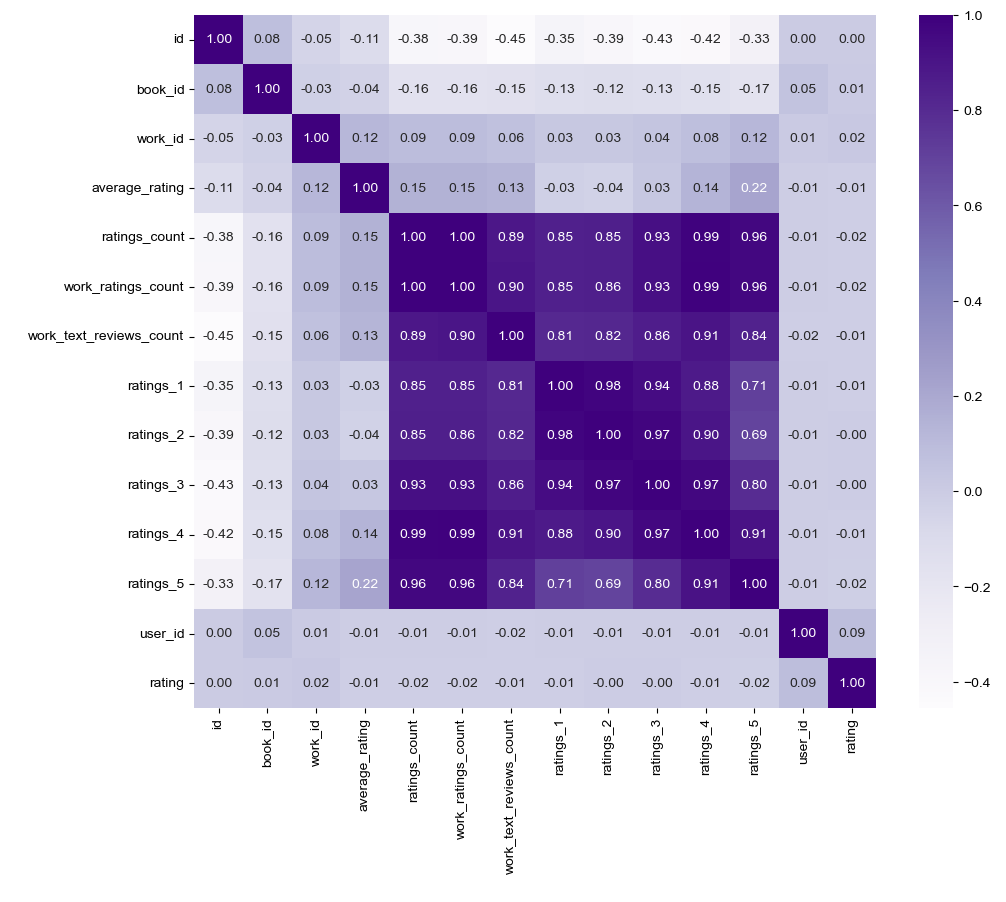

In [29]:
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
sns.set(font_scale=1.5)

We observe some strong correlations